In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

import numpy as np 
import pandas as pd 
import os

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/surakshavk/Placement_predictions/main/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Certification,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [ ]:
df

,Age,Gender,Stream,Internships,CGPA,Certification,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1,4,0,7,0,0,0
2962,23,1,5,1,7,1,0,0
2963,22,1,4,1,7,0,0,0
2964,22,1,1,1,7,0,0,0


In [ ]:
df.shape

(2966, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Certification      2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [ ]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Certification        0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
df["Stream"] = df["Stream"].replace(to_replace = "Electronics And Communication", value = "Electronics")

In [ ]:
df.describe()

,Age,Internships,CGPA,Certification,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


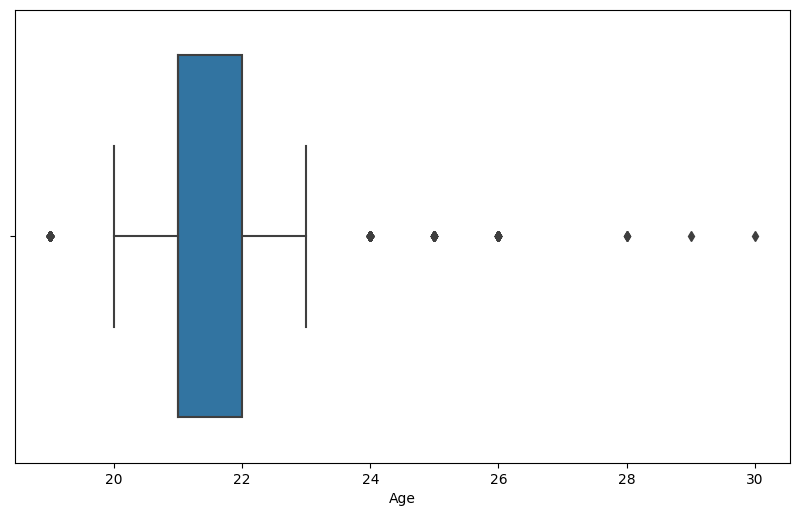

In [ ]:
plt.figure(figsize = (10, 6), dpi = 100)
sns.boxplot(x = "Age", data = df)

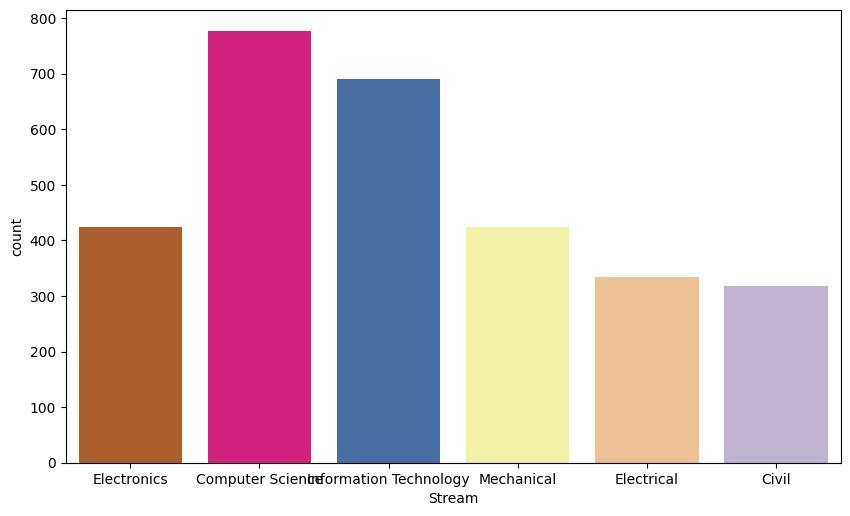

In [ ]:
plt.figure(figsize = (10, 6), dpi = 100)


color_palette = sns.color_palette("Accent_r")
sns.set_palette(color_palette)

sns.countplot(x = "Stream", data = df)

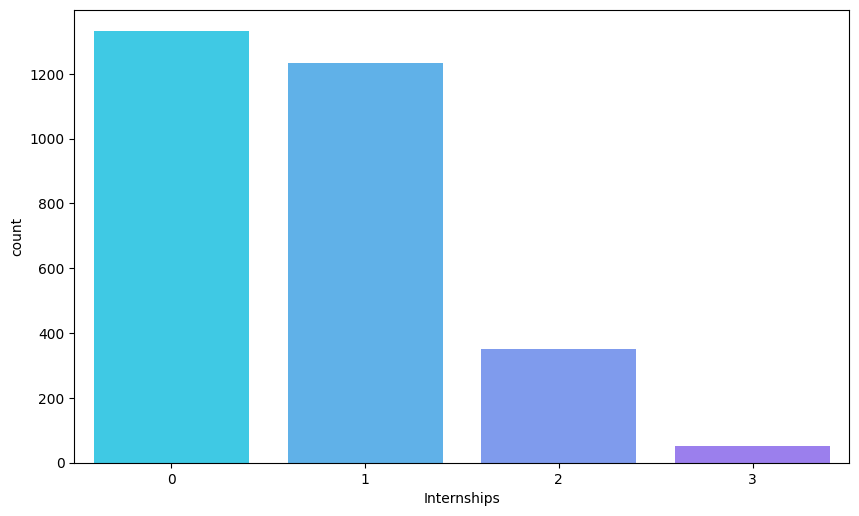

In [ ]:
plt.figure(figsize = (10, 6), dpi = 100)


color_palette = sns.color_palette("cool")
sns.set_palette(color_palette)

sns.countplot(x = "Internships", data = df)
plt.show()

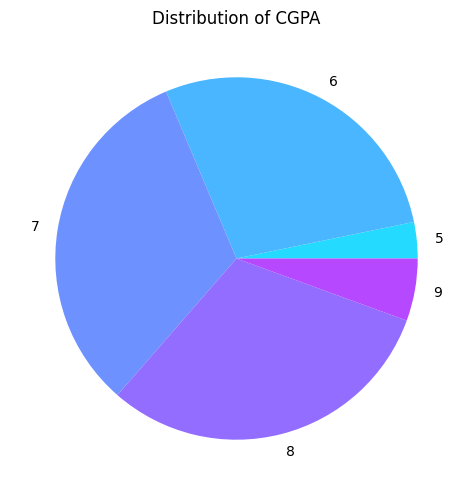

In [ ]:
plt.figure(figsize = (10, 6), dpi = 100)
grp = dict(df.groupby('CGPA').groups)

m = {}

for key, val in grp.items():
    
    if key in m:
        m[key] += len(val)
        
    else:
        m[key] = len(val)

    
plt.title("Distribution of CGPA")
plt.pie(m.values(), labels = m.keys())
plt.show()

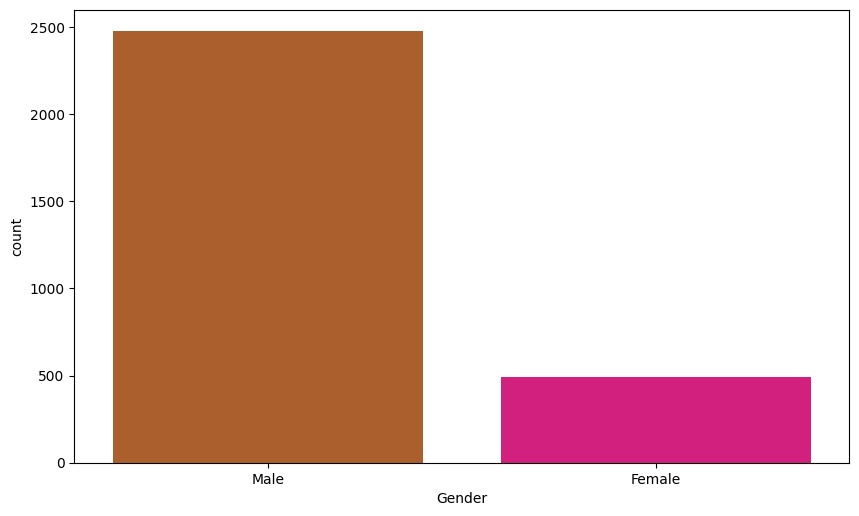

In [ ]:
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("Accent_r")
sns.set_palette(color_palette)

sns.countplot(x = "Gender", data = df)

plt.show()

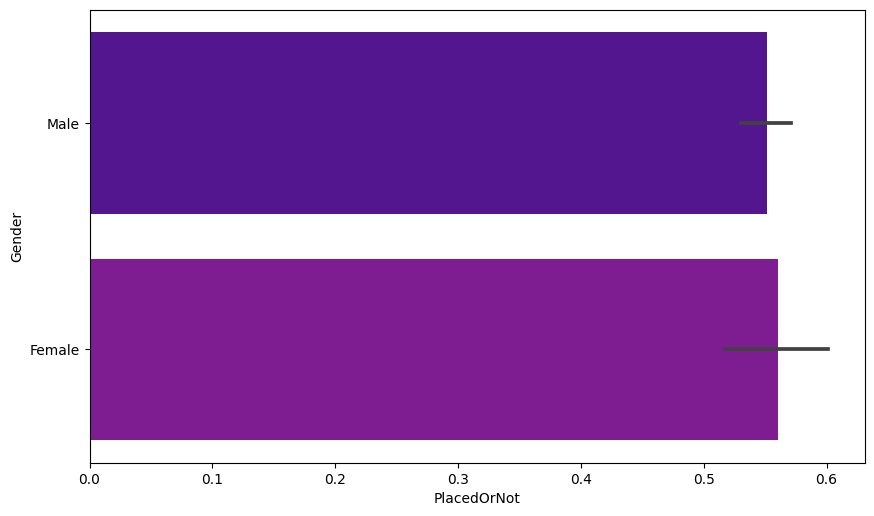

In [ ]:
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("plasma")
sns.set_palette(color_palette)

sns.barplot(x = "PlacedOrNot", y = "Gender", data = df)

plt.show()

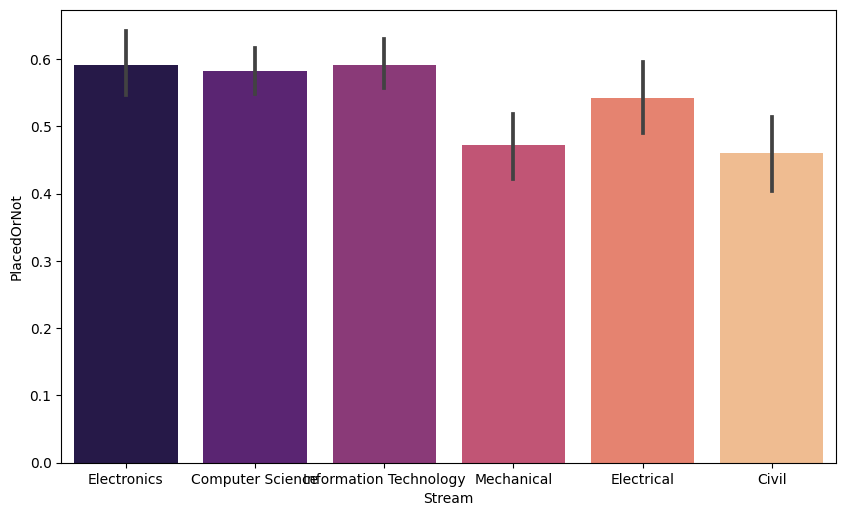

In [ ]:
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("magma")
sns.set_palette(color_palette)

sns.barplot(x = "Stream", y = "PlacedOrNot", data = df)

plt.show()

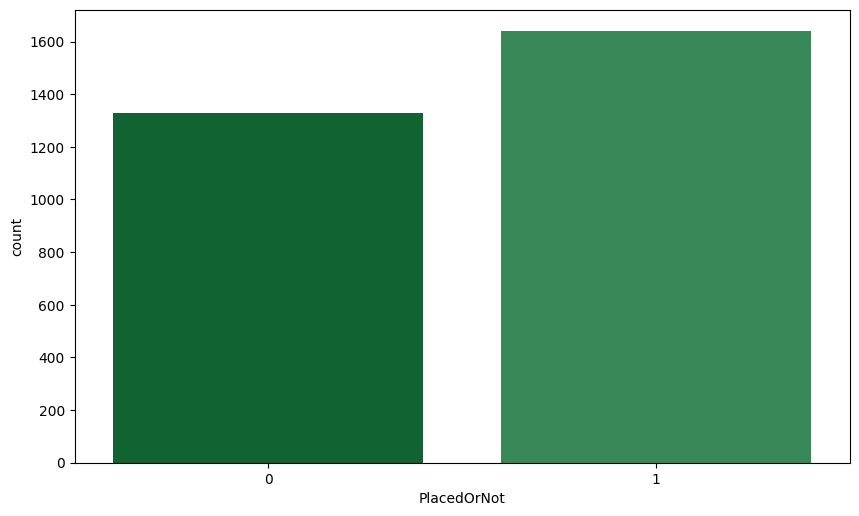

In [ ]:
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("BuGn_r")
sns.set_palette(color_palette)

sns.countplot(x = "PlacedOrNot", data = df)

plt.show()

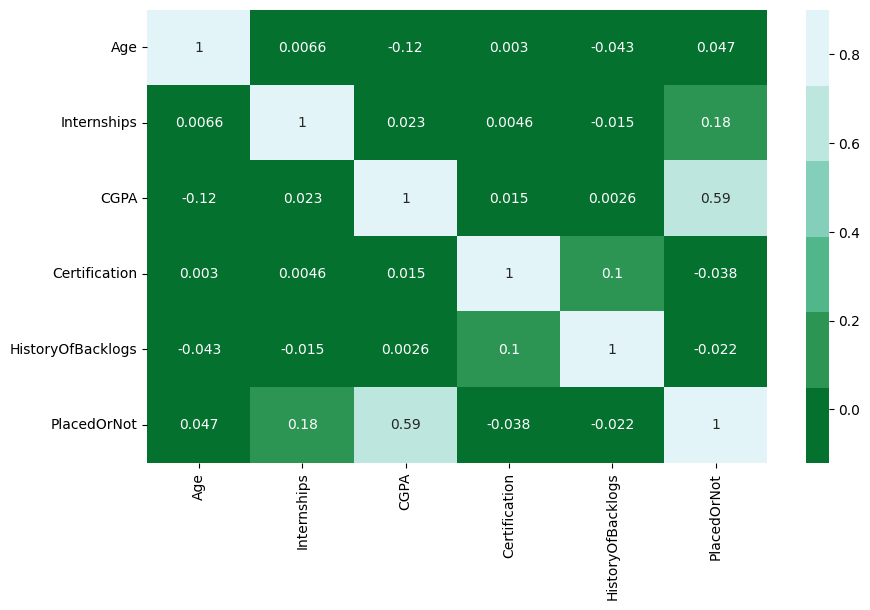

In [ ]:
plt.figure(figsize = (10, 6), dpi = 100)
color = sns.color_palette("BuGn_r")
sns.heatmap(df.corr(), vmax=0.9, annot=True,cmap = color)

In [ ]:
le = preprocessing.LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])
df["Stream"] = le.fit_transform(df["Stream"])

In [ ]:
X=df[['Age', 'Gender', 'Internships', 'CGPA', 'Certification',
       'HistoryOfBacklogs', 'Stream']]
y= df["PlacedOrNot"]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=100)

clff = RandomForestClassifier().fit(x_train,y_train)

pred = clff.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, pred)
acc

0.8741573033707866

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier

X = df[['Age', 'Gender', 'Internships', 'CGPA', 'Certification',
       'HistoryOfBacklogs', 'Stream']]

y = df["PlacedOrNot"]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=100)

clf = CatBoostClassifier(
    iterations = 5, 
    learning_rate = 0.1, 
    loss_function='CrossEntropy',
    
).fit(x_train, y_train)


pred = clf.predict(x_test)

0:	learn: 0.6460034	total: 46.9ms	remaining: 187ms
1:	learn: 0.6054613	total: 48ms	remaining: 72ms
2:	learn: 0.5676533	total: 48.8ms	remaining: 32.5ms
3:	learn: 0.5373964	total: 49.4ms	remaining: 12.4ms
4:	learn: 0.5126927	total: 50.1ms	remaining: 0us


In [ ]:
x={'Age':'22','Gender':'1','Internships':'1','CGPA':'8','Certification':'1','HistoryOfBacklogs':'1','Stream':'3'}
x = pd.DataFrame(x, index=[0])

In [ ]:
df

,Age,Gender,Stream,Internships,CGPA,Certification,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1,4,0,7,0,0,0
2962,23,1,5,1,7,1,0,0
2963,22,1,4,1,7,0,0,0
2964,22,1,1,1,7,0,0,0


In [ ]:
x

,Age,Gender,Internships,CGPA,Certification,HistoryOfBacklogs,Stream
0,22,1,1,8,1,1,3


In [ ]:
clf.predict(x)

array([1])

In [ ]:
x_test

,Age,Gender,Internships,CGPA,Certification,HistoryOfBacklogs,Stream
10,22,1,1,7,0,0,1
247,22,1,0,7,0,0,0
2474,21,1,1,7,0,0,1
31,21,1,1,7,0,0,2
2549,21,1,0,7,0,0,3
...,...,...,...,...,...,...,...
1276,22,1,0,7,1,0,5
1876,22,1,0,6,0,0,1
301,22,1,1,6,0,0,0
2201,21,0,1,7,0,0,4


In [ ]:
acc = accuracy_score(y_test, pred)
acc

0.8820224719101124

# New Section

In [ ]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))